In [1]:
# library
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import chainer
import chainer.links as L
import chainer.functions as F
from chainer import training
from chainer.training import extensions
import json

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/chainer/_environment_check.py:38: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Also note that Chainer does not officially support Mac OS X.
Please use it at your own risk.

  ''')  # NOQA


In [53]:
cancer = load_breast_cancer()
print("cancer kesy：{}".format(cancer.keys()))
print("cancer target_names：{}".format(cancer.target_names))
print("cancer target：{}".format(np.unique(cancer.target)))
print("cancer feasture_names：{}".format(np.unique(cancer.feature_names)))
print("cancer feasture_names shape：{}".format(np.unique(cancer.feature_names.shape)))

cancer kesy：dict_keys(['DESCR', 'target_names', 'target', 'feature_names', 'data'])
cancer target_names：['malignant' 'benign']
cancer target：[0 1]
cancer feasture_names：['area error' 'compactness error' 'concave points error' 'concavity error'
 'fractal dimension error' 'mean area' 'mean compactness'
 'mean concave points' 'mean concavity' 'mean fractal dimension'
 'mean perimeter' 'mean radius' 'mean smoothness' 'mean symmetry'
 'mean texture' 'perimeter error' 'radius error' 'smoothness error'
 'symmetry error' 'texture error' 'worst area' 'worst compactness'
 'worst concave points' 'worst concavity' 'worst fractal dimension'
 'worst perimeter' 'worst radius' 'worst smoothness' 'worst symmetry'
 'worst texture']
cancer feasture_names shape：[30]


array(['malignant', 'benign'], dtype='<U9')

### データセットを作成

In [3]:
def get_target_names(x):
    if x == 0:
        return "malignant"
    if x == 1:
        return "benign"

In [54]:
cancer_data = pd.DataFrame(columns=cancer['feature_names'],data = cancer['data'])
cancer_data['target'] = cancer['target']
cancer_data["target_names"] = cancer_data['target'].apply(lambda x : get_target_names(x))
cancer_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [56]:
cancer_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [5]:
cancer_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'target_names'],
      dtype='object')

In [6]:
cancer_data.shape

(569, 32)

### 入力変数と教師データ（出力変数）に切り分ける

In [7]:
# 教師データ
t = cancer_data.iloc[:,-2]
x = cancer_data.iloc[:,0:-2]

In [8]:
print(t.shape)
print(x.shape)

(569,)
(569, 30)


In [9]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Chainerで計算できるデータ形式に変換
Chainerで計算を行うために、下記の３点を満たしているか確認を行っておきましょう。 こちらが指定された形式となっていない場合、学習の際にエラーが出てしまいます。
```
・入力変数や教師データがNumpyで定義されているか
・分類の場合、ラベルが0から始まっているか
・入力変数が float32、教師データが回帰の場合 float32、分類の場合 int32 で定義されているか
```

In [11]:
# ・分類の場合、ラベルが0から始まっているか
print("type check:{}".format(type(t)))
print("type check:{}".format(type(x)))
print("label check:{}".format(np.unique(t.values)))
print("dtype check:{}".format(t.dtype))
print("dtype check:{}".format(x.values.dtype))

type check:<class 'pandas.core.series.Series'>
type check:<class 'pandas.core.frame.DataFrame'>
label check:[0 1]
dtype check:int64
dtype check:float64


```
メモ：
typeとdtypeがChainerで計算できるデータ形式に
なっていないため変換する必要がありそうです。
```

In [57]:
x = np.array(x.astype('float32'))
t = np.array(t.astype('int32'))

In [58]:
print("type check:{}".format(type(t)))
print("type check:{}".format(type(x)))
print("label check:{}".format(np.unique(t)))
print("dtype check:{}".format(t.dtype))
print("dtype check:{}".format(x.dtype))

type check:<class 'numpy.ndarray'>
type check:<class 'numpy.ndarray'>
label check:[0 1]
dtype check:int32
dtype check:float32


```
正しく型変換できていることが確認できます。
```

### Chainerで使用するデータセットの形式
メモリに乗る程度の小規模なデータの場合は、入力変数と教師データをタプルで１セットにし、それをリスト化しておくことがChainer推奨の形式です。

In [14]:
# Chainerで使用できるデータセットの形式
dataset = list(zip(x, t))

### 教師データと検証データに分割

In [15]:
# 訓練データのサンプル数
n_train = int(len(dataset) * 0.7)

# 訓練データ(train)と検証データ(test)に分割
train, test = chainer.datasets.split_dataset_random(dataset, n_train, seed=1)

In [16]:
train

In [17]:
test

### ニューラルネットワークのモデルを定義


In [18]:
class NN(chainer.Chain):

    # モデルの構造
    def __init__(self, n_mid_units=5, n_out=2):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units)  # 10 → None で自動推定
            self.fc2 = L.Linear(None, n_out)  # 5 → None で自動推定

    # 順伝播
    def __call__(self, x):
        u1 = self.fc1(x)
        z1 = F.relu(u1)
        u2 = self.fc2(z1)
        return u2

In [19]:
np.random.seed(1)
# インスタンス化
nn = NN()
model = L.Classifier(nn)

### optimizer
```
パラメータの更新を行います。
Optimizerではパラメータの最適化を行うための最適化のアルゴリズムを選択します。 各最適化のアルゴリズムにはハイパーパラメータと呼ばれる定数を設定することもできますが、まだここでは触れず、後ほどしっかりと見ていきましょう
```

In [20]:
optimizer = chainer.optimizers.SGD()  # 確率的勾配降下法（SGD）を使用

### 勾配降下法とは
```
確率的勾配降下法は傾きが0となる箇所を探索するために用いられます。
以下の記事で損失関数を最小にすることが大切だと述べました。
wでloss(w)を微分することでより傾きが小さくなる方にwを移動させます。
このように損失をパラメタで微分して勾配を降る方向にパラメタを更新することを勾配降下法(GD)と言います。
勾配降下法は以下の式で表現することができます。
上記の方法を損失が減少しなくなるまで繰り返し行います。

```
### 確率的勾配降下法とは
```
全データではなく、ランダムに取り出したデータの一部(ミニバッチ)を使って損失を計算しパラメータ[w]を更新する方法です。Deep Learningでは一般に学習データが巨大なので確率的勾配法で学習が行われます。
```

In [21]:
optimizer.setup(model)

### Iteratorの定義
```
ミニバッチの学習を行います。Iteratorでは「バッチサイズ」を決めることができます。
順伝播で評価関数を計算するとき全てのサンプルを使用するのではなく、ミニバッチと呼ばれるサンプルの一部のデータセットのみで評価関数の計算を行い、逆伝播で勾配情報を計算し、最適化アルゴリズム（SGDやAdam等）によるパラメータの学習を行います。
```

#### バッチサイズとは
```
バッチサイズとは？
ランダムに抽出したサンプルの一部のデータセットのことです。
100万レコードある場合、100万レコードいっぺんに実施することはメモリやCPUが足りません。
なので100サンプルずつ実施するようにします。この1回の試行で利用するデータのサイズをバッチサイズといいます。
またバッチサイズ1回行うことを1 epochといいます。
100万レコードを、100サンプルずつ行う場合1万epochとなります。
```

In [22]:
batchsize = 10

In [23]:
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter  = chainer.iterators.SerialIterator(test,  batchsize, repeat=False, shuffle=False)


### Updaterでは、Optimizerの設定や使用するデバイス（CPUやGPU）の設定を行えます。

CPUを使用する場合にはdevice=-1とオプションに指定しましょう。
GPUを使用する場合にはdevice=0（GPUを複数枚指している場合はdevice=1なども存在）とオプションで明示しておきましょう。
deviceを指定しない場合は、CPUが使用されます。



In [24]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)


### Trainerとextensionsの設定
Trainerでは、エポック（ミニバッチを全て処理して１エポック）の回数や、そのextensionsでオプションを指定することにより、結果をログ出力や標準出力（インタラクティブに表示）できます

In [25]:
# エポックの数
epoch = 50

In [27]:
# trainerの宣言
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result/cancer')

# 検証データで評価
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))

# 学習の経過をtrainerのoutで指定したフォルダにlogというファイル名で記録する
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))

# １エポックごと（trigger）に、trainデータに対するlossと、testデータに対するloss、経過時間（elapsed_time）を標準出力させる
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))

In [28]:
trainer.run()

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.6175         0.65                      88.772      0.680788              0.107381      
2           0.6325         0.65                      0.67837     0.67138               0.208196      
3           0.6225         0.65                      0.674064    0.665612              0.305967      
4           0.6275         0.65                      0.669229    0.661102              0.417129      
5           0.623077       0.65                      0.66778     0.658048              0.515188      
6           0.625          0.65                      0.665467    0.655788              0.625181      
7           0.6275         0.65                      0.663342    0.653996              0.736354      
8           0.6225         0.65                      0.664488    0.652914              0.844088      
9           0.6275         0.65                      0.661933    0.651891           

### 結果の確認
最後に今回のモデルでの予測結果を確認しておきましょう。 Trainerを使用すると、result/wineというフォルダができ、この中にlogというファイルが自動的に生成されます。 こちらに、学習結果が全て保存されており、後で学習の状況を可視化して確認したりできます。

まずは、logのファイルをPythonで読み込みましょう。

In [29]:
# logファイルから結果の読み込み
with open('result/cancer/log') as f:
    logs = json.load(f)
    results = pd.DataFrame(logs)

In [30]:
# 結果の確認
results

,elapsed_time,epoch,iteration,main/accuracy,main/loss,validation/main/accuracy,validation/main/loss
0,0.107381,1,40,0.617500,88.772014,0.65,0.680788
1,0.208196,2,80,0.632500,0.678370,0.65,0.671380
2,0.305967,3,120,0.622500,0.674064,0.65,0.665612
3,0.417129,4,160,0.627500,0.669229,0.65,0.661102
4,0.515188,5,199,0.623077,0.667780,0.65,0.658048
5,0.625181,6,239,0.625000,0.665467,0.65,0.655788
6,0.736354,7,279,0.627500,0.663342,0.65,0.653996
7,0.844088,8,319,0.622500,0.664488,0.65,0.652914
8,0.940649,9,359,0.627500,0.661933,0.65,0.651891
9,1.046190,10,398,0.625641,0.662214,0.65,0.651171


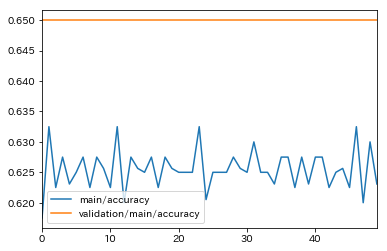

In [31]:
# accuracy（精度）を表示
results[['main/accuracy', 'validation/main/accuracy']].plot()

```
精度は訓練データに対しては62%ほどであり、
検証データに対して65%ほどであることが分かります。
```

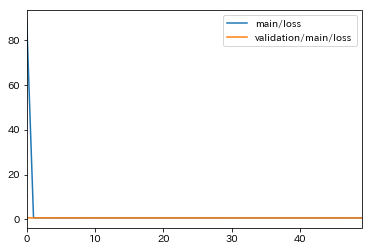

In [32]:
# loss（損失関数）を表示
results[['main/loss', 'validation/main/loss']].plot()

### 精度を上げるために

手っ取り早く精度を上げることが出来る方法として、BatchNormalizationが挙げられます。

In [ ]:
class NN(chainer.Chain):

    # モデルの構造
    def __init__(self, n_mid_units=5, n_out=3):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units)
            self.fc2 = L.Linear(None, n_out)
            self.bn = L.BatchNormalization(10)  # Batch Normalizationは平均と分散がパラメータ

    # 順伝播
    def __call__(self, x):
        h = self.bn(x)  # Batch Normalizationの処理を追加
        h = self.fc1(h)
        h = F.relu(h)
        h = self.fc2(h)
        return h

In [ ]:
# 乱数のシードを固定
np.random.seed(1)

# モデルのインスタンス化
nn = NN()
model = L.Classifier(nn)

# Optimizerの定義
optimizer = chainer.optimizers.SGD()
optimizer.setup(model)  # modelと紐付ける

# Iteratorの定義
batchsize = 10
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

# Updaterの定義
updater = chainer.training.StandardUpdater(train_iter, optimizer, device=-1)

# trainerとそのextensionsの設定
epoch = 50
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result/wine')
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))


In [ ]:
# 学習の実行
trainer.run()